<a href="https://colab.research.google.com/github/sakshisjadhav/Handwritten-digit-recognition/blob/main/Digit%20recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python


In [ ]:
!pip install matplotlib


In [ ]:
!pip install tensorflow

In [ ]:
!pip install numpy


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#scaling 0-255>>0-1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)



In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))#converts grid to single line
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation='softmax'))#confidence metric for numbers from 1-10

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1124 - accuracy: 0.9651
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0758 - accuracy: 0.9765
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0562 - accuracy: 0.9816


In [ ]:
model.save('handwritten_model')

In [ ]:
model= tf.keras.models.load_model('handwritten_model')

In [ ]:
loss, accuracy= model. evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1115 - accuracy: 0.9664


In [ ]:
print(loss)

0.11153693497180939


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(accuracy)

0.9664000272750854


In [ ]:
image=cv2.imread(f"/content/two.png")[:,:,0]
image=image/255.0
image_batch= np.expand_dims(image,axis=0)

In [44]:
prediction = model.predict(image_batch)
print(f"this digit is probably a {np.argmax(prediction)}")

1/1 [==============================] - 0s 36ms/step
this digit is probably a 2


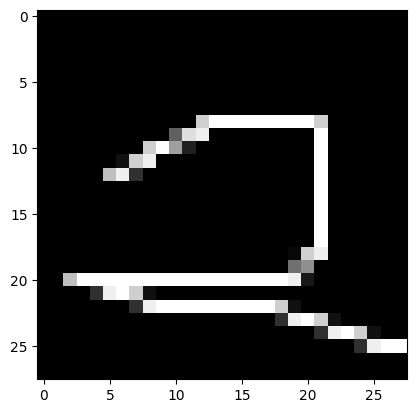

In [ ]:
plt.imshow(image,cmap=plt.cm.binary)
plt.show()